<a href="https://colab.research.google.com/github/islam-mirajul/YouTube-Exaggerated-Bangla-Titles-Categorization/blob/main/YouTube-Exaggerated-Bangla-Titles-Categorization(8%20ML%20Models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import unicodedata

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/youtube project/youtubeRD-csv.csv',error_bad_lines=False)
df

,Title,Type
0,"""বেনিংটন ট্রায়াঙ্গল""- যে বন থেকে ফিরে আসা যায...",অতিরঞ্জিত
1,১ বছরের বাচ্চাটিকে মা একলা বন্ধ ঘরে ফেলে রেখে ...,অতিরঞ্জিত
2,১০ জন মানুষ যাদের কে দেখলে বিশ্বাস করতে পারবেন না,অতিরঞ্জিত
3,১০ জন মানুষ যারা বোকামী করে তাদের জীবন হারিয়েছে,সামঞ্জস্যপূর্ণ
4,10 টি অবাক করে দেয়া ফ্যাক্ট আপনি আগে জানতেন না,অতিরঞ্জিত
...,...,...
1794,হুমায়ুন আহমেদ মৃত্যুর পর যে কথাটি আমাকে সবচেয...,সামঞ্জস্যপূর্ণ
1795,হুয়াং ডাফা -পাহাড়ের সাথে যুদ্ধ করা বাস্তব জী...,অতিরঞ্জিত
1796,হুরে মদিনা এক প্রেমের সত্য কাহিনী। চোখের পানি ...,অতিরঞ্জিত
1797,হেলিকপ্টারে টাকা নিলেও সেই টাকা বাসায় নিতে পা...,সামঞ্জস্যপূর্ণ


In [ ]:
df.isnull().sum()

Title    0
Type     0
dtype: int64

In [ ]:
df['Type'].value_counts()

সামঞ্জস্যপূর্ণ    928
অতিরঞ্জিত         871
Name: Type, dtype: int64

In [ ]:
df['Type'].unique()

array(['অতিরঞ্জিত', 'সামঞ্জস্যপূর্ণ'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X = df['Title']  
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(1439, 887)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1439, 887)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) 
X_train_tfidf.shape

(1439, 887)

In [ ]:
 y_test.shape, X_test.shape,X_train.shape,y_train.shape

((360,), (360,), (1439,), (1439,))

**linearsvc**

In [ ]:

from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

[[121  46]
 [ 45 148]]
                precision    recall  f1-score   support

     অতিরঞ্জিত       0.73      0.72      0.73       167
সামঞ্জস্যপূর্ণ       0.76      0.77      0.76       193

      accuracy                           0.75       360
     macro avg       0.75      0.75      0.75       360
  weighted avg       0.75      0.75      0.75       360

0.7472222222222222


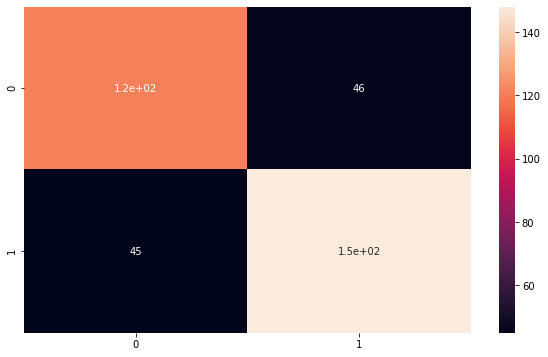

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train_tfidf,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier()),
])
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,

[[ 34 133]
 [ 10 183]]
                precision    recall  f1-score   support

     অতিরঞ্জিত       0.77      0.20      0.32       167
সামঞ্জস্যপূর্ণ       0.58      0.95      0.72       193

      accuracy                           0.60       360
     macro avg       0.68      0.58      0.52       360
  weighted avg       0.67      0.60      0.53       360

0.6027777777777777


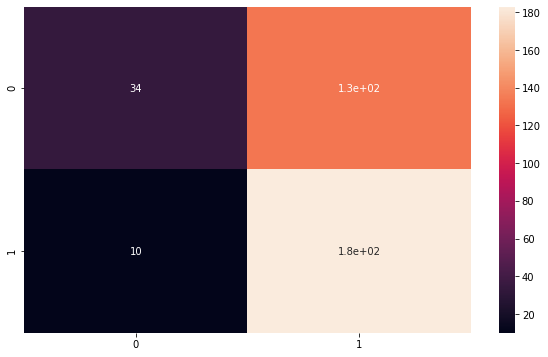

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

**SVC**

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_tfidf,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', SVC()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

[[126  41]
 [ 30 163]]
                precision    recall  f1-score   support

     অতিরঞ্জিত       0.81      0.75      0.78       167
সামঞ্জস্যপূর্ণ       0.80      0.84      0.82       193

      accuracy                           0.80       360
     macro avg       0.80      0.80      0.80       360
  weighted avg       0.80      0.80      0.80       360

0.8027777777777778


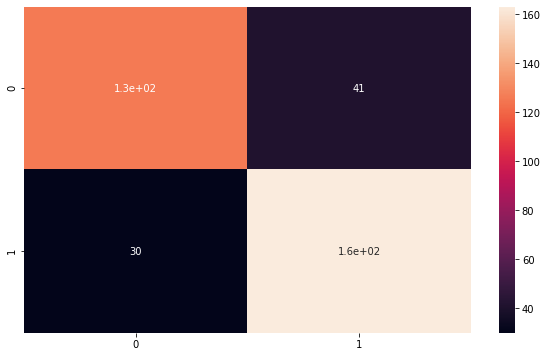

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

**Logisticreg**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

[[128  39]
 [ 39 154]]
                precision    recall  f1-score   support

     অতিরঞ্জিত       0.77      0.77      0.77       167
সামঞ্জস্যপূর্ণ       0.80      0.80      0.80       193

      accuracy                           0.78       360
     macro avg       0.78      0.78      0.78       360
  weighted avg       0.78      0.78      0.78       360

0.7833333333333333


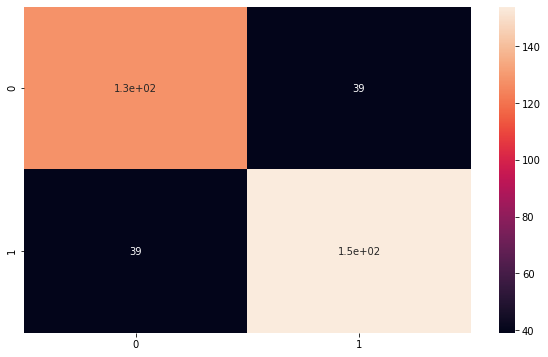

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

**Random** **forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',RandomForestClassifier()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

[[132  35]
 [ 49 144]]
                precision    recall  f1-score   support

     অতিরঞ্জিত       0.73      0.79      0.76       167
সামঞ্জস্যপূর্ণ       0.80      0.75      0.77       193

      accuracy                           0.77       360
     macro avg       0.77      0.77      0.77       360
  weighted avg       0.77      0.77      0.77       360

0.7666666666666667


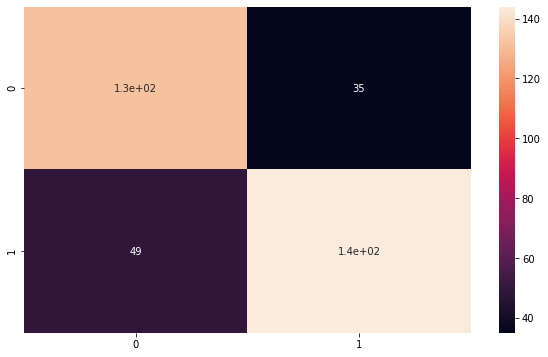

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

**decison** **tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',DecisionTreeClassifier()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
               

[[134  33]
 [ 63 130]]
                precision    recall  f1-score   support

     অতিরঞ্জিত       0.68      0.80      0.74       167
সামঞ্জস্যপূর্ণ       0.80      0.67      0.73       193

      accuracy                           0.73       360
     macro avg       0.74      0.74      0.73       360
  weighted avg       0.74      0.73      0.73       360

0.7333333333333333


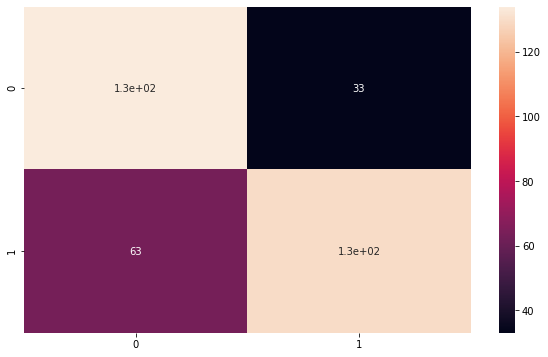

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

**sgd**

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train_tfidf,y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',SGDClassifier()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

[[121  46]
 [ 50 143]]
                precision    recall  f1-score   support

     অতিরঞ্জিত       0.71      0.72      0.72       167
সামঞ্জস্যপূর্ণ       0.76      0.74      0.75       193

      accuracy                           0.73       360
     macro avg       0.73      0.73      0.73       360
  weighted avg       0.73      0.73      0.73       360

0.7333333333333333


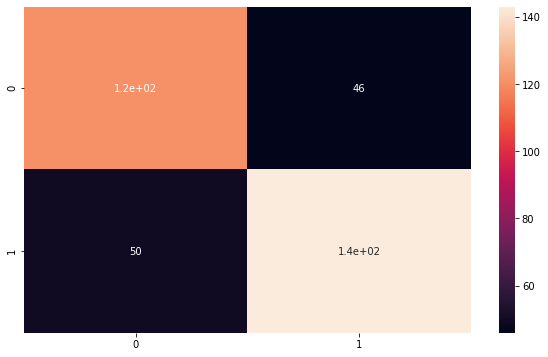

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

**naivebayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',MultinomialNB()),
])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

[[132  35]
 [ 53 140]]
                precision    recall  f1-score   support

     অতিরঞ্জিত       0.71      0.79      0.75       167
সামঞ্জস্যপূর্ণ       0.80      0.73      0.76       193

      accuracy                           0.76       360
     macro avg       0.76      0.76      0.76       360
  weighted avg       0.76      0.76      0.76       360

0.7555555555555555


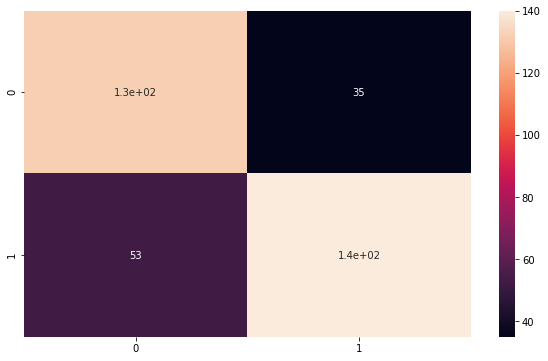

In [ ]:
predictions = text_clf.predict(X_test)
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))